<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Dimensionality Reduction: Principal Component Analysis

#### Oladamola Amieyeofori, University of Texas at Austin

#### Instructor: Michael Pyrcz, Ph.D., P.Eng., Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)
 


### Executive Summary 


Principal Component Analysis (PCA) is often performed primarily for dimensionality reduction while there are other associated advantages that come with the use of PCA which include the capture of the maximum possible variance across features and projects observations onto mutually uncorrelated vectors (i.e., components), the reduction of the training time of models by the simplification of calculations, the automatic removal of multicollinearity, the mitigation of overfit, image compression to mention a few. PCA is a linear dimensionality reduction technique which invariably is one of its limitations. It can separate linear datasets but non-linear datasets do not work well with PCA. Kernel PCA, a non-linear technique solves this problem of the PCA. Kernel PCA works well with non-linear datasets by making them into a linear form and also improving their separability.

Here, PCA and Kernel PCA will be performed on a non-linear dataset (a subsurface dataset). We will then be comparing the performance of the two PCAs on our dataset.
 
   



#### Import Packages

In [766]:
import warnings
warnings.filterwarnings('ignore')                           # suppress warnings
from sklearn.decomposition import PCA                       # PCA and KernelPCA program from scikit learn module
from sklearn.preprocessing import StandardScaler            # standardize variables to mean of 0.0 and variance of 1.0
from sklearn.decomposition import KernelPCA       
from sklearn.naive_bayes import GaussianNB                  #Gaussian Naive Bayes Classifier 
import pandas as pd                                         # dataframes and plotting
import numpy as np                                          # dropping of column and matrix math
import matplotlib.pyplot as plt                             # plotting of graphs and figures
import matplotlib as mpl
import seaborn as sns                                       # data visualization using graphs such as pairplots 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KernelCenterer      
from sklearn import preprocessing
from sklearn.pipeline import Pipeline     #to write a cleaner code 
  from sklearn import metrics

#### Import Data

#### [Data: unconv_MV_V5.csv](https://github.com/GeostatsGuy/GeoDataSets/blob/master/unconv_MV_v5.csv)                                                      

Data adapted from: Dr. Michael Pyrcz's repository in GitHub 

In [767]:
features = pd.read_csv("unconv_MV_v5.csv")             #load in data  


This data is a subsurface data and its also synthetic. It is stored in the variable, features

In [768]:
features                                   #preview data  

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...,...
195,196,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,197,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,198,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,199,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


In machine learning, a feature is referred to as each entity or row in a dataset while the columns describe these entities (Andreas C. Muller and Sarah Guido. Introduction to Machine Learning with Python, 2017 ). Putting this into perspective, we have 200 wells in this data. Each row of the dataframe represents a well and the corresponding columns represent the well's unique properties such as its porosity, permeability, acoustic impedance, brittleness, total organic carbon, etc.

#### [Andreas C. Muller and Sarah Guido. Introduction to Machine Learning with Python, 2017](https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists/dp/1449369413/ref=asc_df_1449369413/?tag=hyprod-20&linkCode=df0&hvadid=312280575053&hvpos=&hvnetw=g&hvrand=2587008073568532433&hvpone=&hvptwo=&hvqmt=&hvdev=c&hvdvcmdl=&hvlocint=&hvlocphy=9028280&hvtargid=pla-423142395481&psc=1)          

A feature can be a predictor feature or a response feature. A predictor feature is the input variable required to be trained to build our machine learning model while a response feature is the output variable that the performance of built model is tested to ascertain the model's performance.

In [769]:
features.drop('Well', axis=1, inplace=True)             # Well index is removed 
                                                        # axis = 1 is applied to identify that 'Well'is in a column
                                      

Well index is removed because it is not a feature of a Well required for this analysis. Also, Well index is written as Well in the line of code because pandas' syntax requires a similar name as it appears on the data.

In [770]:
features

,Por,Perm,AI,Brittle,TOC,VR,Prod
0,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832
...,...,...,...,...,...,...,...
195,11.95,3.13,2.97,67.18,0.80,2.06,3847.571003
196,17.99,9.87,3.38,44.32,0.98,2.08,5601.227131
197,12.12,2.27,3.52,57.07,-0.04,1.73,3409.575363
198,15.55,4.48,2.48,58.25,1.89,2.35,5087.592149


In [771]:
features['Prod'] = features['Prod'].astype(int)

#### Data Preparation

In [772]:
features.describe().T            #calculate summary statistics of the data 
                                 #summary statistics provides a quick summary of the data
        #T in the line of code implies the transpose of the data for the ease of visualizing the statistics of each variable 

,count,mean,std,min,25%,50%,75%,max
Por,200.0,14.99115,2.971176,6.55,12.9125,15.070,17.4025,23.55
Perm,200.0,4.33075,1.731014,1.13,3.1225,4.035,5.2875,9.87
AI,200.0,2.96885,0.566885,1.28,2.5475,2.955,3.3450,4.63
Brittle,200.0,48.16195,14.129455,10.94,37.7550,49.510,58.2625,84.33
TOC,200.0,0.99045,0.481588,-0.19,0.6175,1.030,1.3500,2.18
VR,200.0,1.96430,0.300827,0.93,1.7700,1.960,2.1425,2.87
Prod,200.0,4310.70500,992.041217,2107.00,3617.7500,4284.500,5085.5000,6662.00



The summary statistics includes the spread and the shape of our data by summarizing them with numerical measurements. It helps us to explore the variables of our data: Porosity (Por), Permeability (Perm), Acoustic Impedance (AI), Brittleness (Brittle), Total Organic Carbon (TOC),  Vitrinite Reflectance (VR), Initial Production (Prod) while identifying anomalies in them (if it exists). We can observe from the summary statistics that TOC has a minimum value that is negative. This negative value has to be truncated to zero in order to proceed with our analysis.

It is also important to note that summary statistics helps inform the direction of our analysis.

In [773]:
mod_features = features._get_numeric_data()  #get the numerical values so that the negative value is truncated to zero  
mod_features[mod_features < 0] = 0 
mod_features.describe().T                    #view the summary statistics after the negative value has been truncated 


,count,mean,std,min,25%,50%,75%,max
Por,200.0,14.99115,2.971176,6.55,12.9125,15.070,17.4025,23.55
Perm,200.0,4.33075,1.731014,1.13,3.1225,4.035,5.2875,9.87
AI,200.0,2.96885,0.566885,1.28,2.5475,2.955,3.3450,4.63
Brittle,200.0,48.16195,14.129455,10.94,37.7550,49.510,58.2625,84.33
TOC,200.0,0.99195,0.478264,0.00,0.6175,1.030,1.3500,2.18
VR,200.0,1.96430,0.300827,0.93,1.7700,1.960,2.1425,2.87
Prod,200.0,4310.70500,992.041217,2107.00,3617.7500,4284.500,5085.5000,6662.00


#### [Source Code](https://github.com/GeostatsGuy/Machine_Learning/blob/master/Workflows/SubsurfaceDataAnalytics_PCA.ipynb)                                                      

Code adapted from: Dr. Michael Pyrcz's repository in GitHub 

In [774]:
print('The shape of the features in our data is:', mod_features.shape)

The shape of the features in our data is: (200, 7)


The result informs us of the number of samples in our data (200 wells) and the number of features (7 features) - the sum of predictor and response features

#### Data Visualization / Verification 


To understand the relationship that each feature has with itself and with other features in our data, visualizing our data with the use of plots is a means to do that. We want to understand this relationship to help us know the features to include and the features not to include in our prediction model. Each feature has its unique level of importance to how well its able to help us build an accurate prediction model

Because we have more than 2 features in our data, our data is referred to as a multidimensional data. Visualizing a 2-dimensional data is easy compared to a multidimensional dataset. This is simply because there are several plots that can help us see two features on a an x-y plot at the same time. This is not the case with a dataset having more than two features. Its literally impossible to visualize all the features together at the same on a plot but plots such as a pairplot and a correlation heatmap can visualize multidimensional dataset. These are the two plots we would be using to visualize our data.
.

#### Pairplot

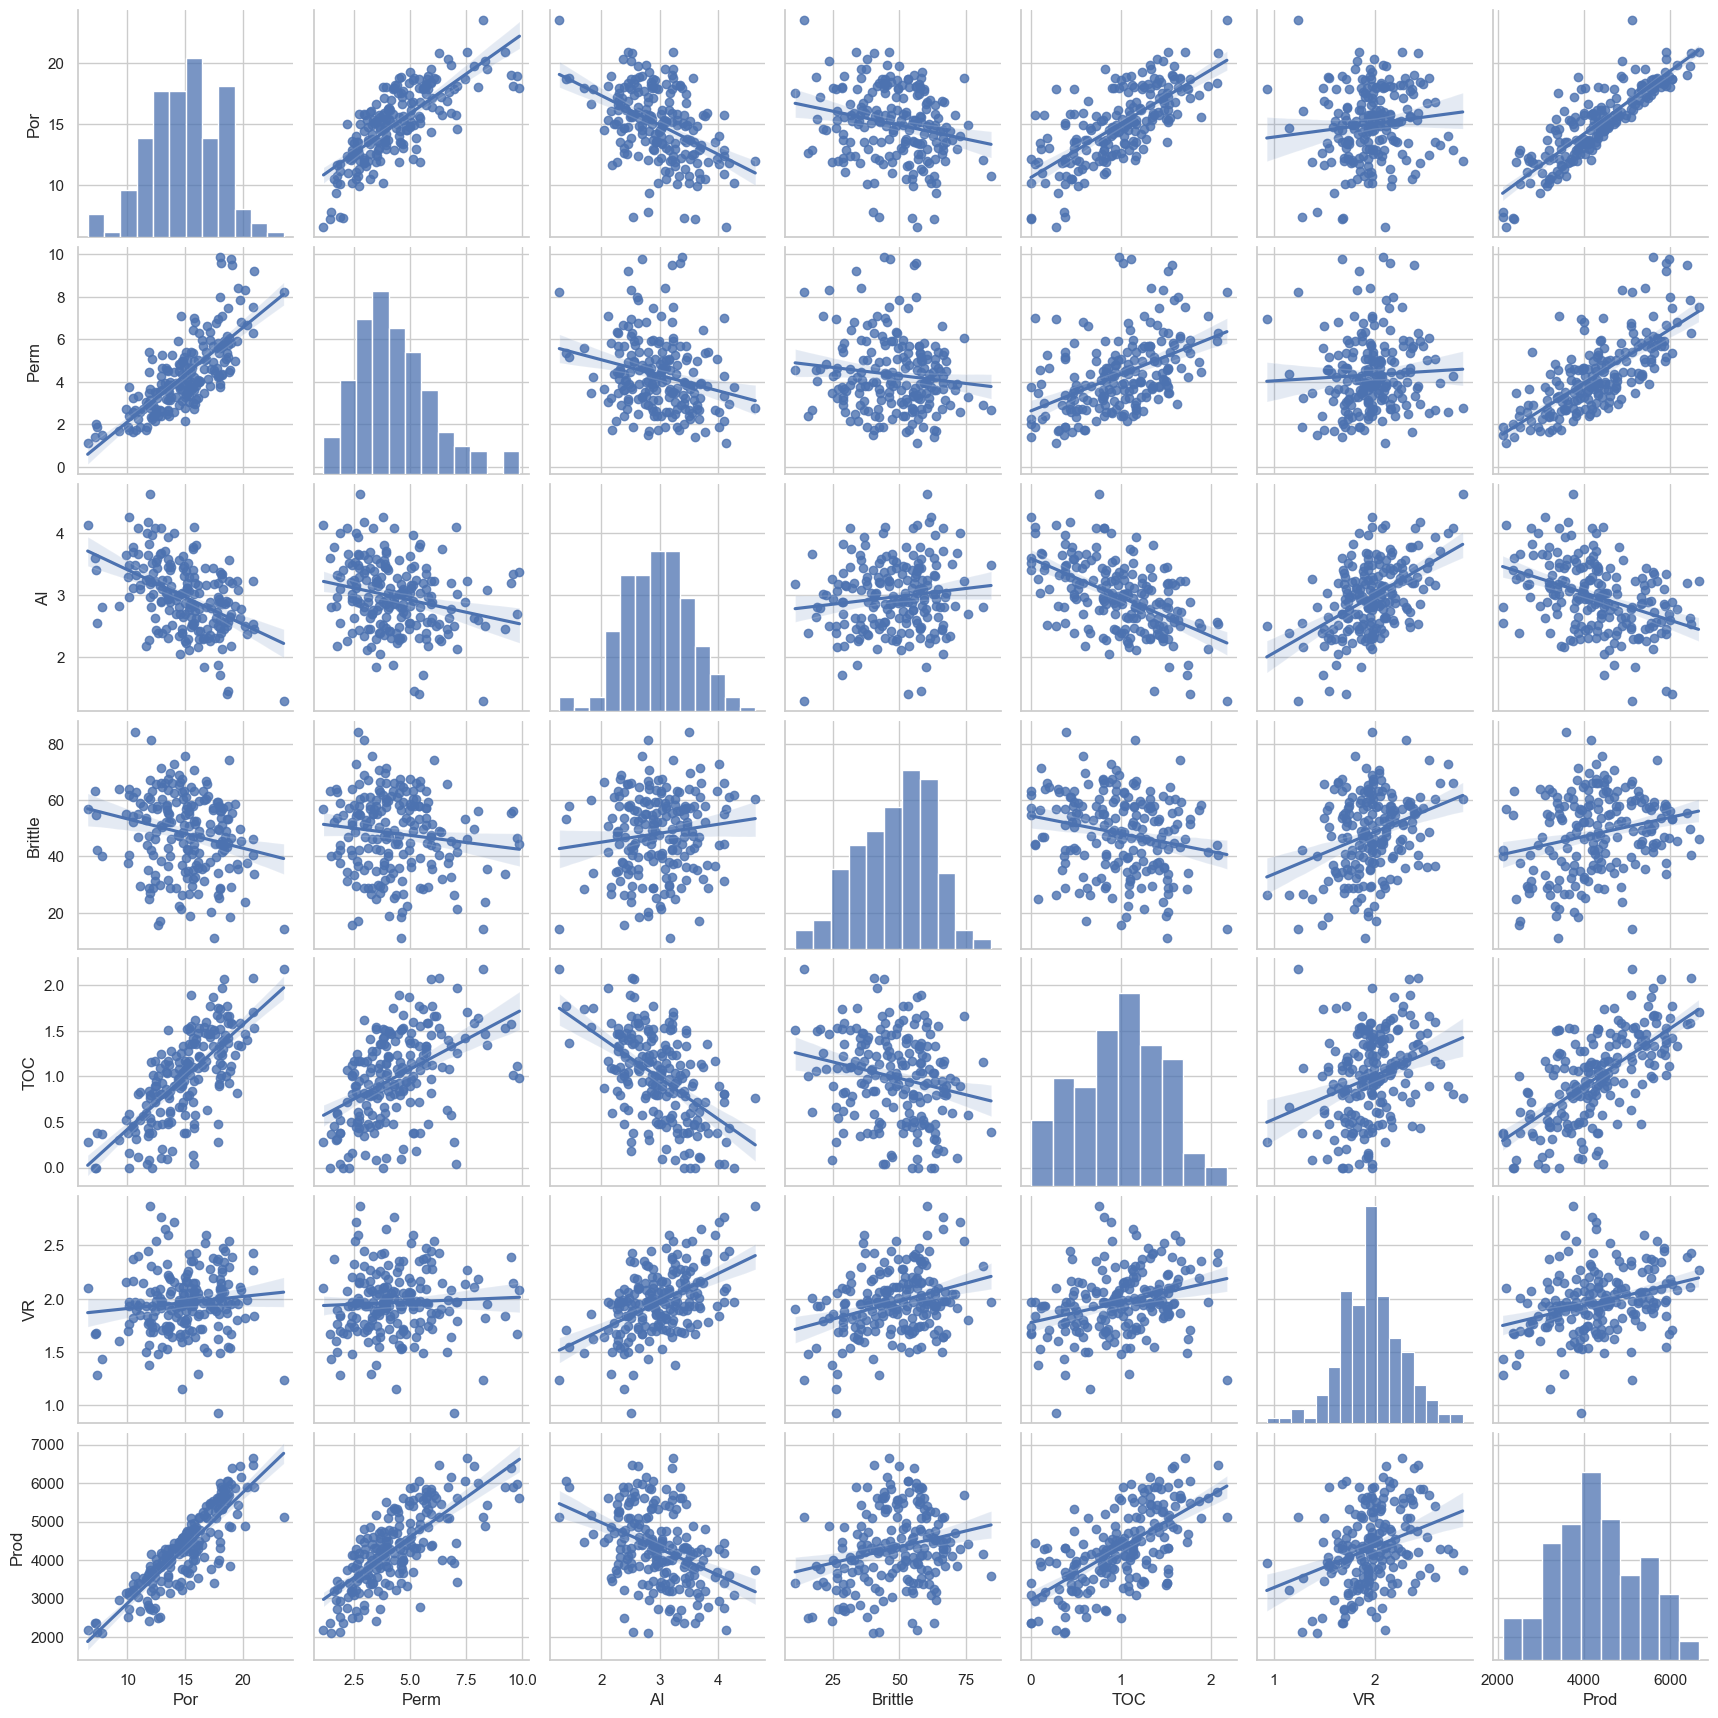

In [775]:
sns.pairplot(mod_features, kind='reg')

On the pairplot, the diagonal histogram plots show the marginal distribution of each of the features with itself while the scatter plots show the joint distribution between one feature with another feature.

The general observation from the bivariate correlation is that the correlation between the features are non-linear. However, permeability and porosity have the strongest correlation amongst all other features in the data. Because 
petroleum reservoir rocks must have porosity and permeability (Ekwere J. Peters. Advanced Petrophysics, 2012), domain knowledge also confirms the importance of these two features to our production prediction model.

#### [Ekwere J. Peters. Advanced Petrophysics, 2012](https://www.amazon.com/Advanced-Petrophysics-Permeability-Heterogeneity-Geostatistics/dp/1936909448) 

To further observe the relationship / correlation between our features, we go ahead with visualizing the dataset using a correlation heatmap. 

#### Correlation Heatmap

<AxesSubplot:>

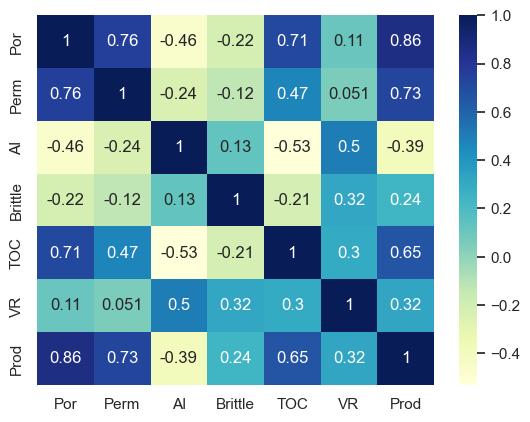

In [776]:
corr = mod_features.corr()                                       #calculate the correlation between variables/features   
sns.heatmap(corr, annot=True, cmap="YlGnBu")    #draw the correlation heatmap for the visualization of correlation

There is a rule of thumb that pearson correlation coefficient value greater than 0.7 indicates the presence of multi-collinearity (Diane Kierman, Natural Resources Biometrics, 2014)


#### [Diane Kierman, Natural Resources Biometrics, 2014](https://milnepublishing.geneseo.edu/natural-resources-biometrics/)  

Multicollinearity refers to the condition where two or more variables in a dataset are highly correlated or related. 

Hence, the observation from our correlation heatmap shows that the features are generally non-linearly related because majority of the values are less than 0.7. However, permeability and porosity are both having strong positive correlation as we already know from the pairplot. This implies that these two features must be included when building our production prediction model.


#### Predictor Features and Response Feature: Convert Data to Arrays 

In [777]:

response_feature = np.array(mod_features['Prod'])   # response feature(s) are the values we want to predict

mod_features = mod_features.drop('Prod', axis=1) # Remove the response feature from the predictor features 

mod_features_list = list(mod_features.columns) # saving predictor feature names 

mod_features = np.array(mod_features)   #convert to numpy array



#### Split Training And Testing Data 

In [778]:

X_train, X_test, y_train, y_test = train_test_split(mod_features, response_feature, test_size = 0.3, random_state = 42)


In [779]:
print('Training Features Shape:', X_train.shape)   #the shape of our data
print('Training Response Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Response Shape:', y_test.shape)

Training Features Shape: (140, 6)
Training Response Shape: (140,)
Testing Features Shape: (60, 6)
Testing Response Shape: (60,)


#### Data Standardization

Before we proceed with the application of PCA and KernelPCA, our data needs to be standardized (i.e., the features should be in the same unit/scale) for the optimal performance of our machine learning algorithm.It is also required for PCA to work. Since the features that make up our data have varying units/scales, we would then standardize our data using scikit learn's StandardScaler.

In [780]:
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

#### Tunning PCA 

When PCA is applied to our data, it combines the most relevant features of our data by first rotating our data and then aligning them with principal component 1 in the direction of the highest variance. The principal components are then calculated with the transform function in the PCA, python package in scikit-learn. In order to confirm that PCA applied on our dataset worked, we would reverse PCA. If we get back the standardized features, it means that PCA worked on our dataset (i.e., we are able to successfully reduce the dimensionality of our dataset as it applies to this workflow)

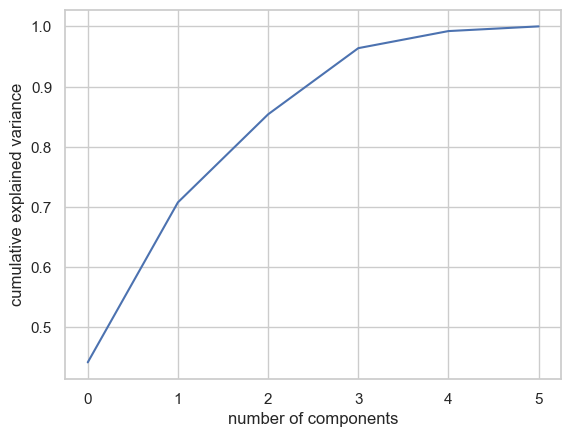

None

In [781]:
#set the number of principal components to be the number of number of predictor features (6) in our data
pca_test = PCA(n_components=X_train.shape[1]) 
pca_test.fit(X_train)

sns.set(style='whitegrid')                                 
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))   #cumulative sum of the explained variance ratio
plt.xlabel('number of components')                        #xlabel is the number of components that we would
plt.ylabel('cumulative explained variance')               #ylabel is the cumulative explained variance 
display(plt.show())                                       #to display the plot


The plot of cumulative explained variance against the number of components demonstrates the number of features that we decide to use for our prediction model. It also helps us to measure the variance of our dataset that we would be explained. Using the plot, if we use four (4) principal components, we would be explaining about 97% variance of our dataset. This means that the remaining two (2) principal components - features that we have are not so important to make our production prediction model.


In [782]:
cvr = np.cumsum(pca_test.explained_variance_ratio_)
evr = pca_test.explained_variance_ratio_

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr

display(pca_df.head(6))

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.442028,0.442028
1,0.707771,0.265743
2,0.853960,0.146189
3,0.963838,0.109877
4,0.992197,0.028359
5,1.000000,0.007803


#### [Source Code](https://github.com/MatheusSchaly/Online-Courses/tree/master/Machine_Learning_A-Z_Hands-On_Python_%26_R_In_Data_Science/)                                                      

Adapted from: MatheusSchaly's repository in GitHub 

This dataframe further shows us the measure of explained variance quantitatively while the plot of cumulative explained variance against the number of component is more of a quanlitative representation. The first principal component, 0 explains the most variance 0.442028. The second principal component explains the next most variance 0.265743 after the first principal component and the variance explained continually decreases as the number of principal component increases. 

The second column of the dataframe is a cumulative of the explained variance ratio: 0.442028 plus 0.265743 gives 0.707771
This tells us that when we use two principal components, 0 and 1, we would have explained 70.7771% of our data and the other 4 principal components left are not as important to our production prediction model. It even gets better when we use 3 principal components, we would have explained 96.3838% of our variance which is quite good. With this result, we can then go ahead to reduce our data from six (6) to three (3) features. 	

#### Tuned PCA

In [783]:
pca = PCA(n_components = 2)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [784]:
X_train.shape

(140, 2)

#### Model Evaluation Function

In [785]:
def evaluate(production_prediction_model, X_test, y_test):
    predictions = production_prediction_model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} MCFPD.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

#### [Source Code](https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/random_forest_explained/Improving%20Random%20Forest%20Part%202.ipynb)                                                      

Adapted from: WillKoehrsen's repository in GitHub 

#### Model Performance: Fitting Gaussian Naive Bayes Classifier with the Training Data (After PCA)


In [786]:
pca_prediction_model = GaussianNB()                              #create a Gaussian classifier 
pca_prediction_model.fit(X_train, y_train)                       #train the model using the training sets
y_pred_pca = pca_prediction_model.predict(X_test) 
pca_accuracy = evaluate(pca_prediction_model, X_test, y_test)

Model Performance
Average Error: 673.6333 MCFPD.
Accuracy = 82.79%.


#### Tuned KernelPCA 

In [788]:
kpca = KernelPCA(n_components = 2, kernel ='rbf', gamma = 0.008, fit_inverse_transform =True)
kpca.fit(X_train)
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

#### Model Performance: Fitting Gaussian Naive Bayes Classifier with the Training Data (After KernelPCA)  

In [790]:
kpca_prediction_model = GaussianNB()                              #create a Gaussian classifier 
kpca_prediction_model.fit(X_train, y_train)                       #train the model using the training sets
y_pred_kpca = kpca_prediction_model.predict(X_test) 
kpca_prediction_model_accuracy = evaluate(kpca_prediction_model, X_test, y_test)

Model Performance
Average Error: 686.9333 MCFPD.
Accuracy = 81.16%.


#### Pipeline Creation

To have a modular code that is easier to manage, we will be creating a pipeline. This is a chain of the processes involved in building our machine learning model - production predicton model. This includes: 

1. Data preprocessing by using Standard Scaler for data standardization 
2. Dimensionality reduction using PCA and KernelPCA
3. Application of Gaussian Naive Bayes Classifier 

The creation of this pipeline involves the use of functions (rather than several lines of code) in the order in which each process will be executed.This makes debugging easier in a case where there's an error in any of the functions. It also makes ones code easier to read by others 

In [795]:
# Fit to data and predict using pipelined GNB and PCA
pca_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
pca_clf.fit(X_train, y_train)
pred_test_pca = pca_clf.predict(X_test)


In [796]:
# Fit to data and predict using pipelined GNB and KernelPCA
kpca_clf = make_pipeline(StandardScaler(), KernelPCA(n_components=2, kernel="rbf",
                                                     gamma=0.0433, fit_inverse_transform=True), GaussianNB())
kpca_clf.fit(X_train, y_train)
pred_test_kpca = kpca_clf.predict(X_test)

#### Oladamola Amieyeofori, University of Texas at Austin

Research Areas: High resolution measurements of methane emissions from oil and gas operations


I hope this was helpful